---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

<!-- {{< include instructions.qmd >}}  -->

# Introduction and Motivation:

The primary objective of this Exploratory Data Analysis (EDA) is to explore and identify the key factors that influence YouTube audience engagement. Through a comprehensive analysis, we aim to uncover patterns and trends that drive audience behavior on the platform.


# Overview of Methods
This EDA will include several types of analysis:

- **Bivariate Analysis**: Examining two features to better understand the distribution and characteristics of key variables:
  - Analyzing the distribution of caption values by video popularity(high or low)
  - Analyzing the distribution of video duration by video popularity(high or low)
  - Identifying the top 15 individual topic categories.
  - Identify the top 15 individual topic categories of popular videos.

- **Multivariate Analysis**: Exploring relationships and interactions between different features, such as the correlation between likes and comments or the effect of video category on engagement:
  - Find distribution of video duration by video popularity
  - Using a correlation matrix to examine numerical variables.
  - Utilizing crosstabs to analyze categorical variables.
  - Investigating the relationship between like count and view count.

- **Data Distribution and Normalization**: Evaluating the distribution of key variables and assessing their suitability for further analysis:
  - Analyzing the skewness and kurtosis of view counts.
  - Analyzing the skewness and kurtosis of like counts.
- **Statistical Testing**: Conduct basic statistical tests:
  - Conducting t-tests and chi-square tests to explore potential relationships between variables.

The insights derived from this analysis will provide a deeper understanding of the factors contributing to audience engagement, forming a solid foundation for future predictive modeling

# Code
## Import cleaned data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [2]:
data = pd.read_csv("../../data/processed-data/cleaned_data.csv")
data = data.drop(columns=["Unnamed: 0"]) if "Unnamed: 0" in data.columns else data # remove the unnamed column

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

print("\nFirst Few Rows:")
display(data.head())

print("\nBasic Statistics:")
display(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                2208 non-null   object 
 1   channelTitle            2208 non-null   object 
 2   title                   2208 non-null   object 
 3   tags                    1156 non-null   object 
 4   publishedAt             2208 non-null   object 
 5   viewCount               2208 non-null   float64
 6   likeCount               2153 non-null   float64
 7   dislikeCount            0 non-null      float64
 8   favoriteCount           2208 non-null   int64  
 9   commentCount            2184 non-null   float64
 10  duration                2208 non-null   int64  
 11  definition              2208 non-null   object 
 12  caption                 2208 non-null   bool   
 13  topicCategories         2202 non-null   object 
 14  popularity              22

,video_id,channelTitle,title,tags,publishedAt,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,duration,definition,caption,topicCategories,popularity,popularity_multi_class
0,b6FTKe-u8XI,Richard Restatement,Can I get scout badgetherookie viralvideo fory...,NaN,2024-11-20T22:42:00Z,0.049597,0.139295,NaN,0,0.009236,59,hd,False,Entertainment Film,high,high
1,W_19sjpQttw,Succesful Celebrity,Bill Nye The Science Guy Shows Kai Cenat A Sci...,kai cenat kai cenat imkaicenat amp kai cenat l...,2024-11-17T17:01:47Z,0.082768,0.193623,NaN,0,0.033605,26,hd,False,Entertainment Film Television_program,high,high
2,udVz8GN_DP0,Kieran Ta,Youre not gonna hit me again are you supernatu...,NaN,2024-11-18T03:13:34Z,0.045601,0.105196,NaN,0,0.007719,58,hd,False,Entertainment Film Television_program,high,high
3,iOecn1gSBZY,M2M Heart,Open the cash with moneyThis is funniest robbe...,NaN,2024-11-16T13:00:53Z,0.070301,0.179141,NaN,0,0.013535,59,hd,False,Entertainment Film,high,high
4,u1IuChCXplQ,9-1-1 house,He realized that they did not stop death,NaN,2024-11-20T19:52:08Z,0.032618,0.069746,NaN,0,0.007707,60,hd,False,Entertainment Film,high,high



Basic Statistics:


,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,duration
count,2208.000000,2153.000000,0.0,2208.0,2184.000000,2208.000000
mean,0.017055,0.026817,NaN,0.0,0.014774,929.403080
std,0.041650,0.057310,NaN,0.0,0.044780,2790.428613
min,0.000000,0.000000,NaN,0.0,0.000000,10.000000
25%,0.001437,0.001700,NaN,0.0,0.002301,34.750000
50%,0.005317,0.006941,NaN,0.0,0.005831,60.000000
75%,0.017203,0.028407,NaN,0.0,0.014094,921.500000
max,1.000000,1.000000,NaN,0.0,0.999957,42901.000000



Missing Values:
video_id                     0
channelTitle                 0
title                        0
tags                      1052
publishedAt                  0
viewCount                    0
likeCount                   55
dislikeCount              2208
favoriteCount                0
commentCount                24
duration                     0
definition                   0
caption                      0
topicCategories              6
popularity                   0
popularity_multi_class       0
dtype: int64


## EDA

### **Bivariate Analysis**

- **Numerical Variables**:
    - Provide summary statistics 
    - Analyze distribution of two features : ***Histogrm of Caption Inclusion by Popularity***

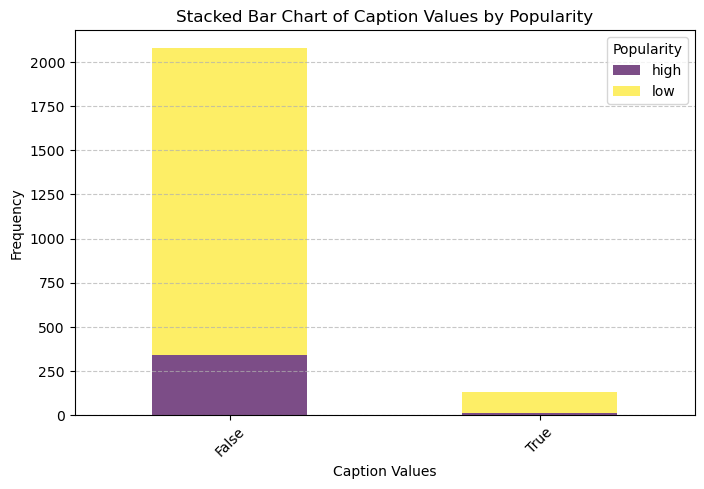

In [4]:
grouped_data = data.groupby(['caption', 'popularity']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped_data.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='viridis',  # Choose a colormap for encoding
    alpha=0.7
)

# Chart details
plt.title("Stacked Bar Chart of Caption Values by Popularity")
plt.xlabel("Caption Values")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title='Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From this plot, we can see that most of youtube videos do not include captions for audiences. This plot is a stacked bar chart that represents the frequency of caption values categorized by popularity ("high" and "low", high popularity means the video has more than 6000000 views). The bars are segmented by the popularity levels, with distinct colors assigned to each category ("high" in purple and "low" in yellow). This chart effectively highlights the distribution of popularity levels across different caption values, and it suggest that embedding caption or not would not lead to increasing popularity of videos.

- **Numerical Variables**:
    - Analyze distribution of two features : ***Scatter Plot of Video Duration by Popularity***

/var/folders/0k/58z97my108j9p_yv9d2xvzxr0000gn/T/ipykernel_25476/1976354669.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='popularity', y='duration', data=data, jitter=True, alpha=0.6, palette='Set2')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


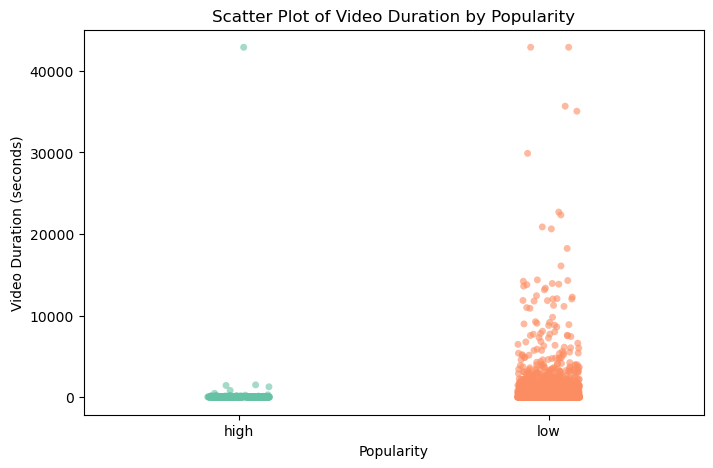

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for duration vs popularity
plt.figure(figsize=(8, 5))
sns.stripplot(x='popularity', y='duration', data=data, jitter=True, alpha=0.6, palette='Set2')
plt.title("Scatter Plot of Video Duration by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Video Duration (seconds)")
plt.show()


This scatter plot visualizes the relationship between video duration (in seconds) and popularity levels ("high" and "low"). Videos with "low" popularity show a wider range of durations, and even with very large outliers representing very long videos. In contrast, "high" popularity videos tend to cluster at shorter durations, suggesting that creating and watching shorter videos is a social trend. This trend could indicate that audiences prefer concise content, or it might reflect platform-specific optimization for shorter videos.

### **Categorical Variables**:
- Present frequency counts and visualize distributions: ***Topic categories pie chart***

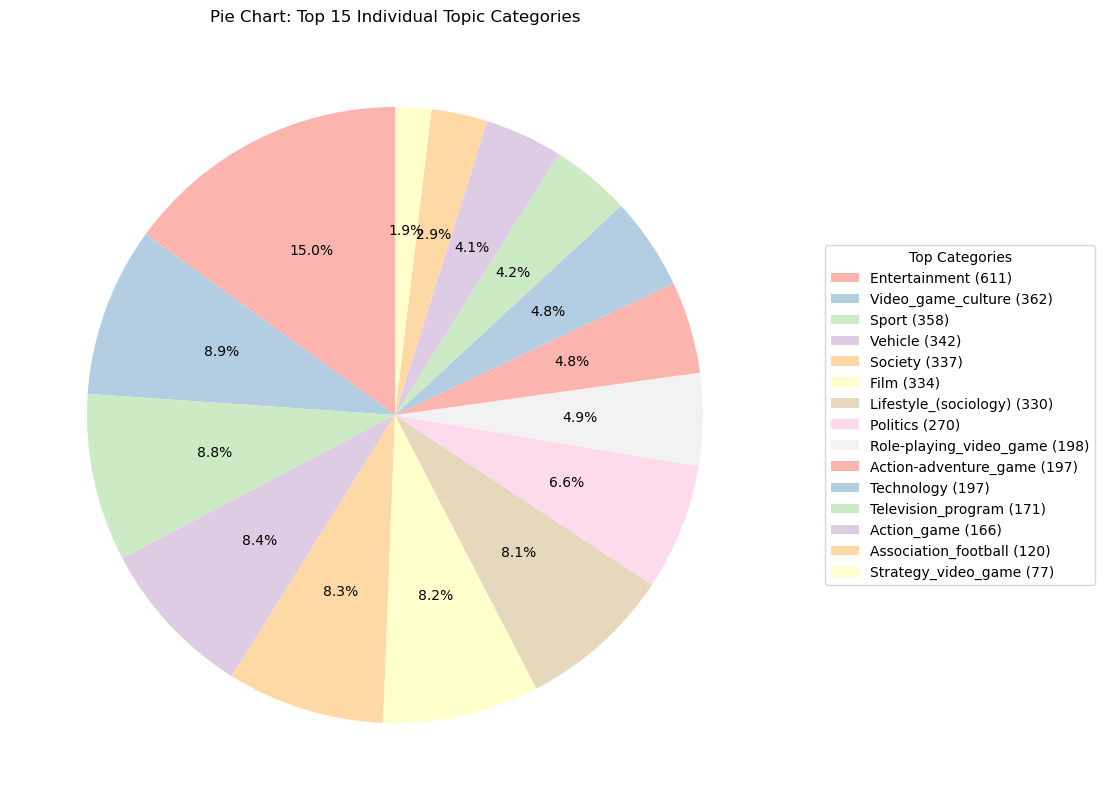

In [6]:
data['topicCategories'] = data['topicCategories'].fillna('')  # Handle NaN values
all_categories = data['topicCategories'].str.split(' ').explode()  # Split and flatten

# Count frequency of each category
category_counts = all_categories.value_counts()

top_20_categories = category_counts.head(15)
    
plt.figure(figsize=(10, 10))
plt.pie(
    top_20_categories.values, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors
)

labels = [f"{label} ({value})" for label, value in zip(top_20_categories.index, top_20_categories.values)]
plt.legend(
    labels,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),  # Adjust position of the legend
    title="Top Categories"
)

plt.title("Pie Chart: Top 15 Individual Topic Categories")
plt.show()


Most of the videos we randomly selected from YouTube globally fall under the topics of Entertainment, with Video Game and Video Game Culture videos ranking as the top two categories. Among the top 15 topics selected for our analysis, we found that five of them are related to gaming. This suggests that there is a significant audience interest in game-related content on YouTube, highlighting the popularity of entertainment and gaming among viewers.

/var/folders/0k/58z97my108j9p_yv9d2xvzxr0000gn/T/ipykernel_25476/1985519554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_data['topicCategories'] = popular_data['topicCategories'].fillna('')  # Handle NaN values


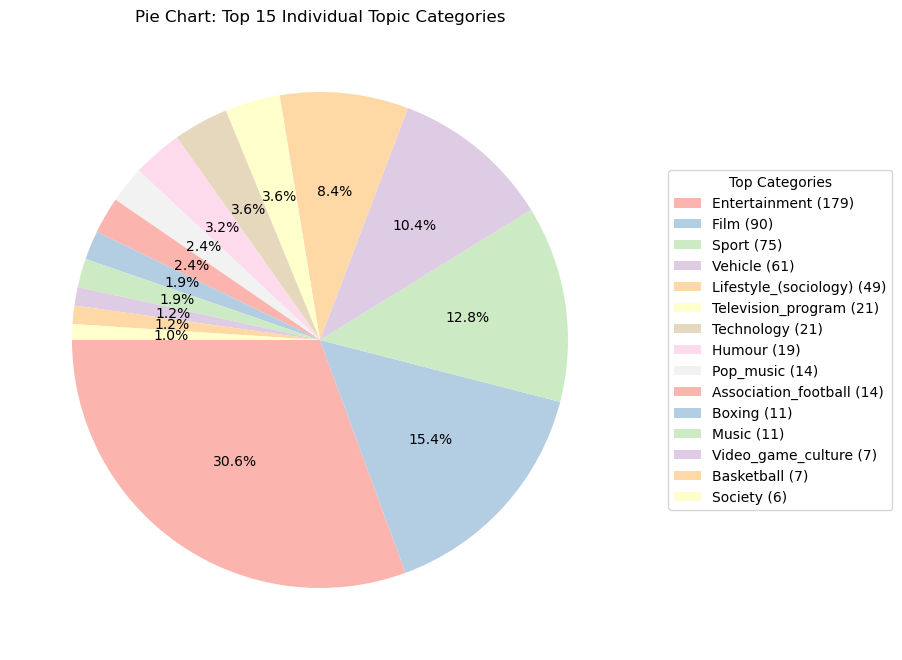

In [7]:
popular_data = data[data["popularity"]=="high"]
popular_data['topicCategories'] = popular_data['topicCategories'].fillna('')  # Handle NaN values
all_categories = popular_data['topicCategories'].str.split(' ').explode()  # Split and flatten

# Count frequency of each category
category_counts = all_categories.value_counts()

top_20_categories = category_counts.head(15)
    
plt.figure(figsize=(8,10))
plt.pie(
    top_20_categories.values, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=180, 
    colors=plt.cm.Pastel1.colors
)

labels = [f"{label} ({value})" for label, value in zip(top_20_categories.index, top_20_categories.values)]
plt.legend(
    labels,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),  # Adjust position of the legend
    title="Top Categories"
)

plt.title("Pie Chart: Top 15 Individual Topic Categories")
plt.show()


This pie chart visualize the distribution of the top 15 individual topic categories from the dataset, highlighting their respective proportions. The "Entertainment" category dominates with 30%, followed by "Film" (15%), "Sport" (13%), and "Vehicle" (10%). The remaining categories, including "Lifestyle (Sociology)" (8%), "Television Program" (3.6%), and others, represent smaller shares of the dataset. This visualization effectively emphasizes the prevalence of entertainment-related content while showing the diversity of other topics.

In [8]:
# Filter high-popularity videos and calculate duration stats per topic
pivot_melted = (
    data[data["popularity"] == "high"]
    .groupby('topicCategories')['duration']
    .agg(['min', 'max', 'count'])
    .reset_index()
    .sort_values(by='count', ascending=False)
    .rename(columns={'topicCategories': 'Topic', 'min': 'Min Duration', 'max': 'Max Duration', 'count': 'Video Count'})
)

# Split topics into individual words and explode them into rows
pivot_melted = (
    pivot_melted
    .assign(Melted_Topic=pivot_melted['Topic'].str.split(' '))
    .explode('Melted_Topic')
    .drop(columns='Topic')
    .rename(columns={'Melted_Topic': 'Topic'})
)

# Combine duplicate topics and aggregate statistics
pivot_melted = (
    pivot_melted
    .groupby('Topic', as_index=False)
    .agg({
        'Min Duration': 'min',
        'Max Duration': 'max',
        'Video Count': 'sum'
    })
    .sort_values(by='Video Count', ascending=False)
)

# Display the final result
display(pivot_melted.head(15))

,Topic,Min Duration,Max Duration,Video Count
8,Entertainment,10,175,179
9,Film,14,175,90
35,Sport,10,1452,75
39,Vehicle,10,61,61
18,Lifestyle_(sociology),10,1521,49
38,Television_program,17,42896,21
37,Technology,14,1521,21
15,Humour,10,175,19
28,Pop_music,13,302,14
2,Association_football,10,840,14


The output of this code provides a summarized table of YouTube video topics with high popularity.

- Topic Names: Distinct keywords extracted from the original topic categories (e.g., "Entertainment," "Film").
- Duration Range: Minimum and maximum video durations for each topic.
- Video Count: The total number of videos in each topic.
  
The results are sorted by video count in descending order, highlighting the most frequent topics and their duration patterns. This helps identify dominant video themes and the typical duration ranges associated with popular videos.

### **Multivariate Analysis**:

#### **Correlation Analysis**:
  - Analyze relationships between numerical variables using Pearson Correlation matrix and Spearman Correlation matrix
  - Analyze relationships between numerical variables using a correlation matrix: ***Correlation Heatmap plot***

In [9]:
print("----------------------")
print("SPEARMAN CORRELATION MATRIX:")
print("----------------------")
display(data.corr(method='spearman',numeric_only=True).fillna(0))

----------------------
SPEARMAN CORRELATION MATRIX:
----------------------


,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,duration,caption
viewCount,1.000000,0.933141,0.0,0.0,0.337583,-0.571253,-0.081384
likeCount,0.933141,1.000000,0.0,0.0,0.335939,-0.569777,-0.121677
dislikeCount,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
favoriteCount,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
commentCount,0.337583,0.335939,0.0,0.0,1.000000,0.090784,0.131055
duration,-0.571253,-0.569777,0.0,0.0,0.090784,1.000000,0.168698
caption,-0.081384,-0.121677,0.0,0.0,0.131055,0.168698,1.000000


From this top-level visualization of correlation between features, we can see that view counts are highly correlated with like counts; view counts or like counts are not closely correlated with comment counts; view counts and like counts are moderately negatively correlated with duration. The trends suggest that YouTube audiences in general prefer shorter videos than longer ones, and they may not comment on vidoes even they view or like the videos. 

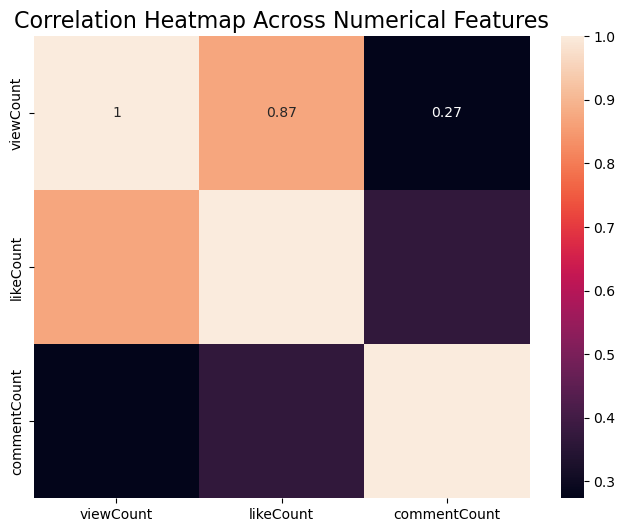

In [10]:
numerical_features = data[['viewCount', 'likeCount', 'commentCount']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap Across Numerical Features', fontsize=16)
plt.show()

The heatmap suggest there is a higher correlation between like counts and view counts than the correlation between view counts and comment counts. 

#### **Cross-tabulations**:
  - For categorical variables, use crosstabs to explore relationships: ***cross tabulation of video definition(high definition / standard definition) and caption embedding***


caption     False  True 
definition              
hd           2074    130
sd              3      1


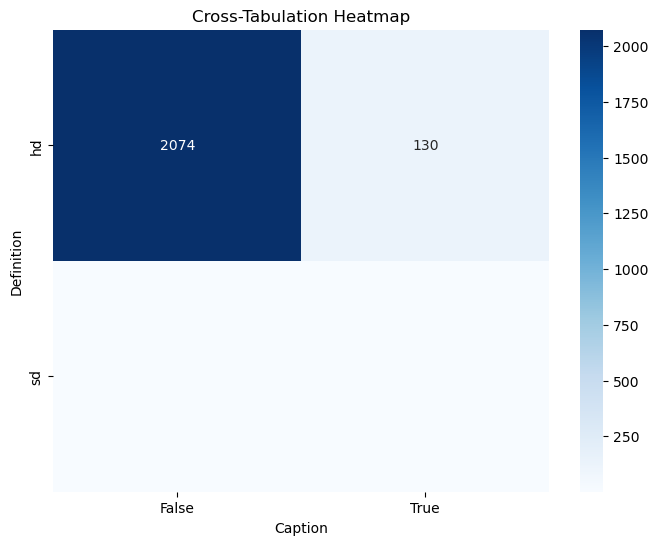

In [11]:

crosstab_result = pd.crosstab(data['definition'], data['caption'])
print(crosstab_result)
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result, annot=True, cmap='Blues', fmt="d")
plt.title("Cross-Tabulation Heatmap")
plt.ylabel("Definition")
plt.xlabel("Caption")
plt.show()

The cross-tabulation plot shows most of the videos are in high definition quality and without caption.

#### **Feature Pairings**:
  - Analyze relationships between key variables: ***Scatter plot of View Counts and Duration***

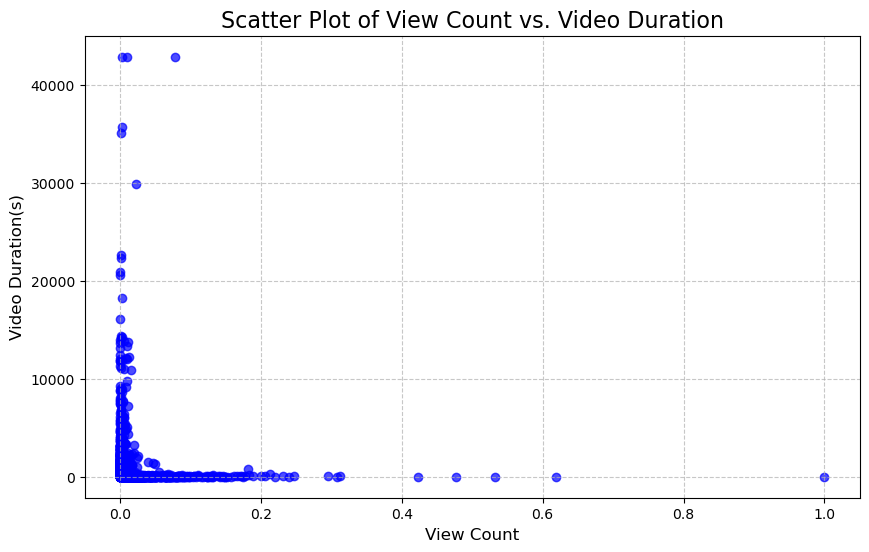

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['viewCount'], data['duration'], color='blue', alpha=0.7)

plt.title('Scatter Plot of View Count vs. Video Duration', fontsize=16)
plt.xlabel('View Count', fontsize=12)
plt.ylabel('Video Duration(s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

From the plot, we can observe a negative relationship between video duration and view count. Specifically, videos with shorter durations tend to have higher view counts. This suggests that audiences prefer shorter videos in the current media landscape, possibly due to the ease of consumption and the trend towards quick, engaging content. The high view counts for shorter videos may also reflect a growing trend of continuous viewing, where users are more likely to watch a series of short videos in a single sitting. This trend aligns with the popularity of short-form video platforms (e.g., TikTok, YouTube Shorts), where users tend to engage with bite-sized content in a loop, contributing to higher overall engagement.

### **Data Distribution and Normalization:**

- **Skewness and Kurtosis:**:
    - Analyze and discuss the distribution of variables.: ***Distribution of view counts and like counts***

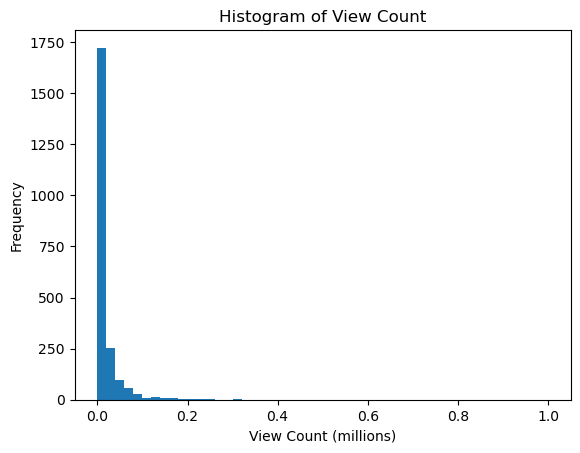

In [13]:
viewcounts_df = data[['viewCount']]
viewcounts_df = viewcounts_df[viewcounts_df['viewCount'] != 0]

plt.hist(viewcounts_df["viewCount"], bins=50)
plt.title('Histogram of View Count')
plt.xlabel('View Count (millions)')
plt.ylabel('Frequency')
plt.show()

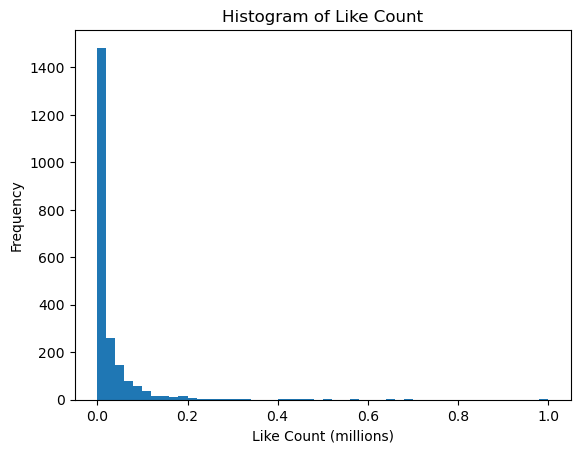

In [14]:
likecounts_df = data[['likeCount']]

plt.hist(likecounts_df["likeCount"], bins=50)
plt.title('Histogram of Like Count')

plt.xlabel('Like Count (millions)')
plt.ylabel('Frequency')
plt.show()

**Interpretation**: The histogram of like counts and view counts are highly right skewed and include very large outliers according to the distributions. 

In [15]:
skewness = data['viewCount'].skew()
kurtosis = data['viewCount'].kurtosis()

print(f"Skewness of view counts: {skewness}")
print(f"Kurtosis of view counts: {kurtosis}")


Skewness of view counts: 10.672893845120713
Kurtosis of view counts: 186.37037135267474


- Skewness: The skewness value indicates a strong positive skew. This means the distribution of view counts is heavily right-skewed, with a long tail on the right side. Most of the videos have lower view counts, but there are a few videos with extremely high view counts, pulling the average upward.

- Kurtosis: The kurtosis value is extremely high, suggesting that the distribution has heavy tails and a sharp peak. This indicates that there are many extreme outliers (i.e., videos with exceptionally high view counts) in your data. These outliers significantly affect the overall distribution, making it more "peaked" compared to a normal distribution, which has a kurtosis of 3.

In [16]:
skewness = data['likeCount'].skew()
kurtosis = data['likeCount'].kurtosis()

print(f"Skewness of like counts: {skewness}")
print(f"Kurtosis of like counts: {kurtosis}")

Skewness of like counts: 6.4863537512329135
Kurtosis of like counts: 68.364500479544


- Both view counts and like counts exhibit positive skewness, meaning there are a few items with very high values. However, view counts are more extremely skewed than like counts, indicating that there are more videos with significantly higher views compared to likes. This suggests that view counts have a wider disparity, with certain videos getting far more views than likes.

- Both features exhibit high kurtosis, indicating heavy tails and outliers. However, the view count distribution is much more peaked and has more extreme outliers than like counts. This means that while both view counts and like counts have some extreme values, the view counts have far more extreme outliers with a sharper peak, whereas the like counts have somewhat fewer but still significant outliers.

In summary, the kurtosis value and skewness value suggest that although some videso gained high view counts, people just slided through the videos without hitting the like button. 

### **Statistical Insights**:

**Hypotheses for Chi-square tests:**

- Null Hypothesis (H₀): There is no significant association between the viewCount and likeCount.

- Alternative Hypothesis (H₁): There is a significant association between the viewCount and likeCount.


In [17]:
# Create a contingency table
contingency_table = pd.crosstab(data['viewCount'], data['likeCount'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-value: {p_value}")

P-value: 0.2409455758561337


As the result shows, we can see that the p-value is greater than 0.05, which means we fail to reject the null hypothesis that there is no significant association between viewCount and likeCount. Therefore, viewCount and likeCount have a significant association.

**Hypotheses for Independent T-test:**
- Null Hypothesis (H₀): There is no significant difference between the mean like count of high definition videos and standard definition videos.
- Alternative Hypothesis (H₁): There is a significant difference between the mean like count of high definition videos and standard definition videos.

In [18]:
like_count_hd = data['likeCount'][data["definition"] == "hd"].dropna() # like counts of videos in high definition
like_count_sd = data['commentCount'][data["definition"] == "sd"].dropna()  # like counts of videos in standard definition

# Perform an independent T-test (equal variance by default)
t_statistic, p_value = stats.ttest_ind(like_count_hd, like_count_sd)

# Display the result
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpreting the result
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T-statistic: -4.371805625489004
P-value: 1.2909463665668727e-05
Reject the null hypothesis: There is a significant difference between the means.


As the result shows, we can see that the p-value is less than 0.05, which means we should reject the null hypothesis, and there is significant association between the mean like count of high definition videos and standard definition videos. And audiences have preference on definition of videos.

# Conclusions and Next Steps:

In this Exploratory Data Analysis (EDA), we examined various factors that contribute to YouTube audience engagement. Below is a summary of the key findings and their technical implications:

1. **Bivariate Analysis**:
   - We analyzed the distribution of captions in either popular videos or less popular videos and found that most videos had missing captions, which may suggest that captions are not consistently utilized. This could imply that captions are not a major contributor to engagement in this dataset.
   - We analyzed the distribution of video durations in either popular videos or less popular videos and found that most popular videos are short in duration. This could imply that length of duration play an important role in popularity.
   - The top 15 individual topic categories revealed a clear dominance of entertainment-related content. This suggests that viewers are more likely to engage with content in popular categories, which is an important consideration for content creators looking to maximize audience engagement.

2. **Multivariate Analysis**:
   - **Correlation Matrix**: A significant positive correlation between view count and like count was observed, indicating that videos with higher viewership tend to receive more likes. This relationship is intuitive, as videos that are more popular are likely to be liked by a greater proportion of viewers.

   - **Crosstabs for Categorical Variables**: The cross-tabulation heatmap reveals that the majority of videos are in high-definition quality and do not have captions, as indicated by the higher counts in the corresponding cells. This suggests that while HD videos dominate the dataset, captioning remains less common among the videos analyzed.
   
   - **Relationship Between Video Duration and View Count**:  The plot shows a negative correlation between video duration and view count, with shorter videos attracting more views. This indicates a preference for quick, engaging content, reflecting the rise of short-form video platforms like TikTok and YouTube Shorts, where users often watch multiple short videos in a single sitting.


3. **Data Distribution and Normalization**:

   - **Skewness and Kurtosis**: Both view count and like count showed signs of positive skewness, indicating that most videos have relatively low views and likes, with a few videos receiving extremely high engagement. This suggests that engagement is not uniformly distributed and is heavily concentrated on a few videos.

   - **Statistical Tests**: The chi-square test suggests that view counts and like counts have a significant association. The Independent T-test suggest that there is a significant difference between the mean of like counts of high definition videos and standard definition videos. This could guide further exploration of additional features or more refined models.

### **Technical Implications**:
- The positive correlation between views and likes suggests that predictive models focused on view count could potentially predict like count with a certain degree of accuracy.
- The skewness observed in the data indicates the need for normalization or transformation if these variables are to be used in predictive modeling, as they may distort the results of machine learning algorithms.
- The lack of significant findings from some of the tests suggests that certain variables may need further refinement or exploration to better understand their impact on engagement.
